# Лабораторная работа №2
## Визуальный анализ данных

### Подключение библиотек

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Загрузка данных

In [2]:
data_path = "../datasets/telecom_churn/telecom_churn.csv"
data = pd.read_csv(data_path)
data.head(10)
# data.columns

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


### Одиночные признаки
#### Количественные признаки

In [4]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

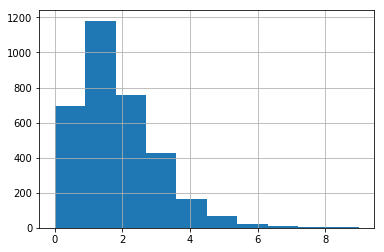

In [5]:
# Применение pandas для визуализации данных
# Pandas работает как настройка над matplotlib
data['Customer service calls'].hist();

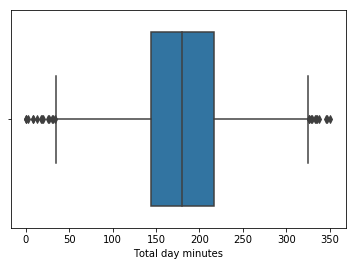

In [6]:
# использование Seaborn
# Построение диаграммы типа "ящик с усами"
# по диаграмме можно определить медиану, квартили,
# интерквартильный размах, выбросы
sns.boxplot(data['Total day minutes']);

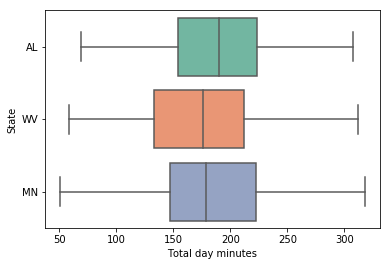

In [7]:
top_data = data[['State','Total day minutes']]
top_data = top_data.groupby('State').sum()
top_data = top_data.sort_values('Total day minutes',ascending=False)
top_data = top_data[:3].index.values
sns.boxplot(y='State', 
            x='Total day minutes', 
            data=data[data.State.isin(top_data)], palette='Set2');

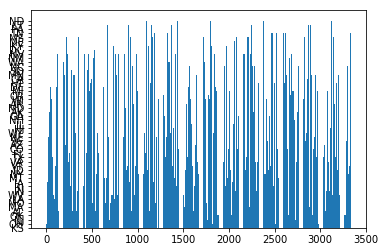

In [8]:
plt.bar(data.index, data['State'])
plt.show()

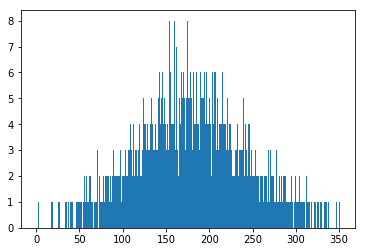

In [16]:
hist = data['Total day minutes'].value_counts()
plt.bar(hist.index, hist);

In [17]:
# jn,jh ghbpyfrjd
feats=[f for f in data.columns if 'charge' in f]
feats

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

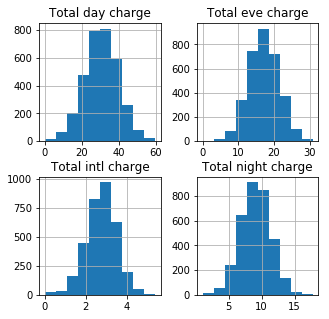

In [19]:
# построение гистограммы для нескольких признаков
data[feats].hist(figsize=(5,5));

### Категориальные признаки

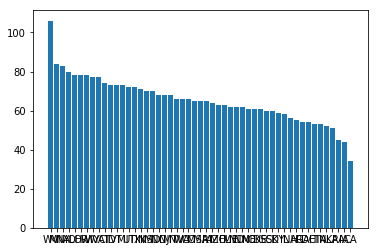

In [21]:
# определение первых n "популярных" штатов 
# data['State'].value_counts().head(10)
hist = data['State'].value_counts()
plt.bar(hist.index, hist);


In [22]:
# фактически бинарный признак
data['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

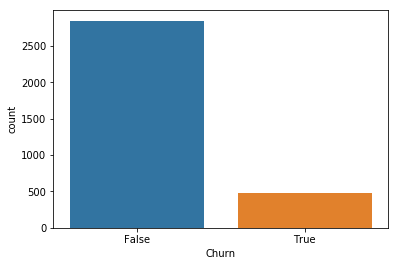

In [23]:
sns.countplot(data['Churn']);

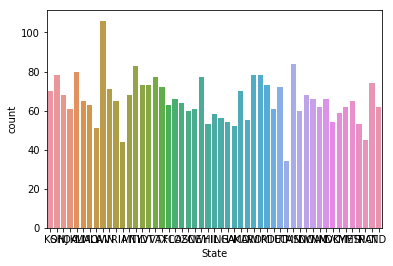

In [24]:
# гистограмма для всех штатов
sns.countplot(data['State']);

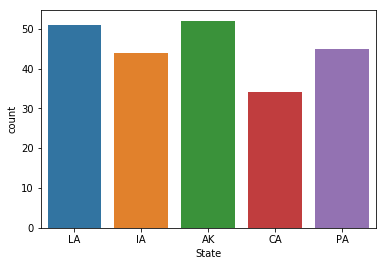

In [25]:
# гистограмма "популярных" штатов
sns.countplot(data[data['State'].isin(data['State'].value_counts().tail(5).index)]['State']);

### Взаимосвязанные признаки
#### Количественный - количественный

In [26]:
# список колонок
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [27]:
# Отбор числовых признаков, содержащих слово 'charge'
feats = [f for f in data.columns if 'charge' in f]
len(feats)
# feats=['Total day calls', 'Total day charge']

4

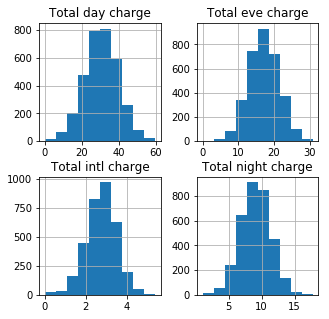

In [29]:
# строим отдельные гистограммы 
# для нескольких признаков
data[feats].hist(figsize=(5,5));

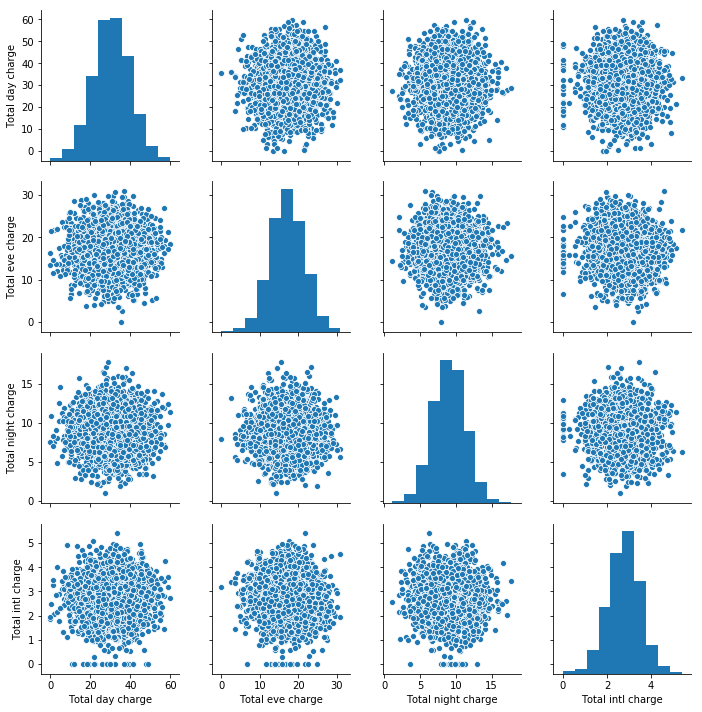

In [30]:
# Попарное распределение признаков
# Применение Seaborn
sns.pairplot(data[feats]);

Можно строить более сложные попарные распределения признаков

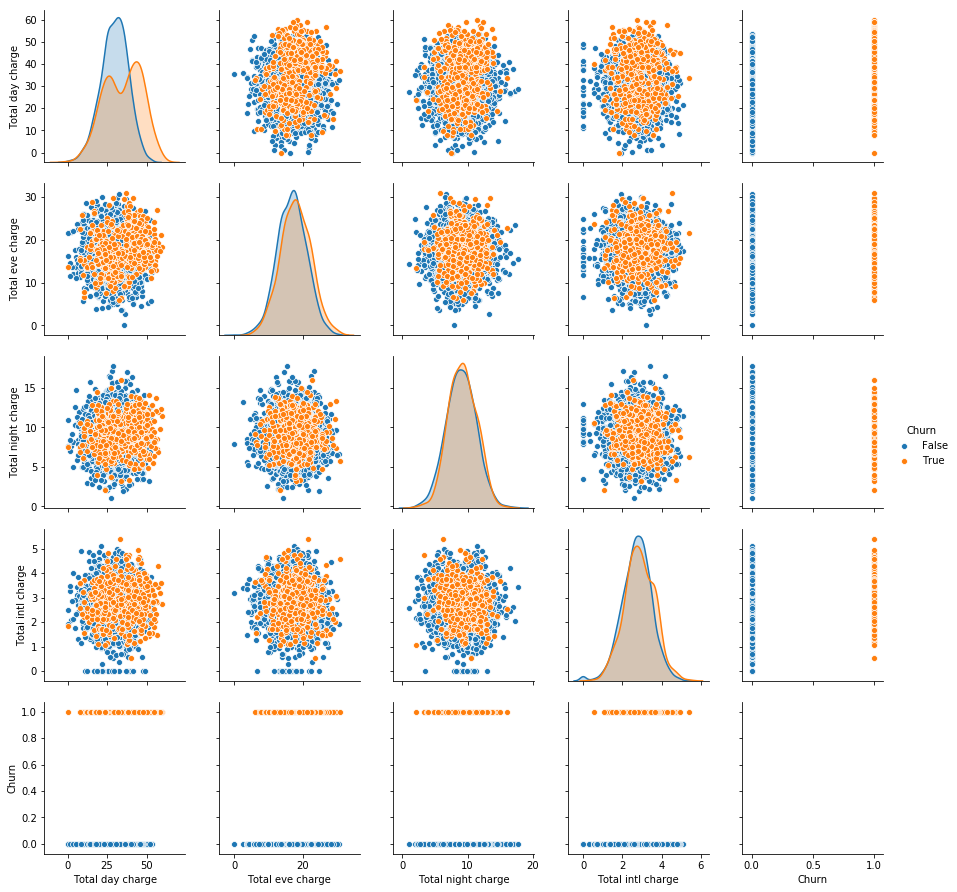

In [33]:
sns.pairplot(data[feats + ['Churn']], hue='Churn');

Использование matplotlib, подписей данных, заголовков
Использование простейших пользовательских цветов

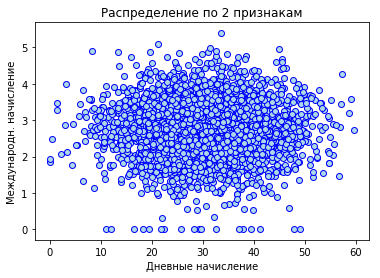

In [34]:
plt.scatter(data['Total day charge'], 
            data['Total intl charge'], 
            color='lightblue', edgecolors='blue')
plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление')
plt.title('Распределение по 2 признакам');

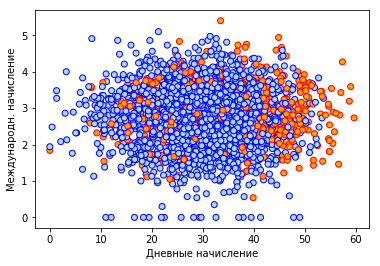

In [35]:
# Раскрашивание данных
# Цвет в зависимости от ухода клиента
c = data['Churn'].map({False: 'lightblue', True: 'orange'})
edge_c = data['Churn'].map({False: 'blue', True: 'red'})
# Настройка графика
plt.scatter(data['Total day charge'], data['Total intl charge'],
            color=c, edgecolors=edge_c
           )
plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление');

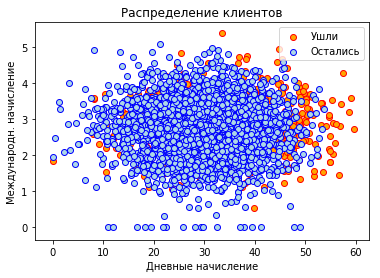

In [36]:
# Раскраска лояльных и ушедших клиентов,
# добавление легенды

# Ушедшие клиенты
data_churn = data[data['Churn']]
# Оставшиеся клиенты
data_loyal = data[~data['Churn']]

plt.scatter(data_churn['Total day charge'], 
            data_churn['Total intl charge'],
            color='orange',
            edgecolors='red',
            label='Ушли'
           )
plt.scatter(data_loyal['Total day charge'], 
            data_loyal['Total intl charge'],
            color='lightblue',
            edgecolors='blue',
            label='Остались'
           )
plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление')
plt.title('Распределение клиентов')
plt.legend();

### Корреляция признаков

In [37]:
# Применяется функция corr() из Pandas
data.corr()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


В реальных задачах анализ такой матрицы затруднен,
необходимо или автоматизировать (скрипты), или визуализировать (графики)

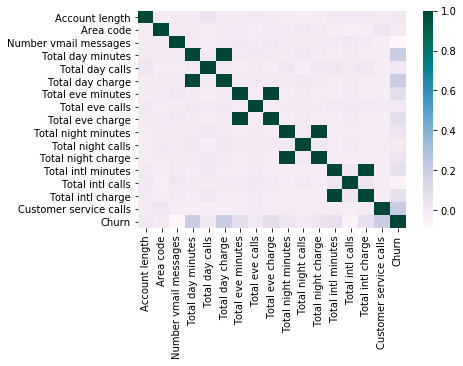

In [38]:
sns.heatmap(data.corr(), cmap=plt.cm.PuBuGn);

Из карты heatmap видно, что некоторые признаки коррелируют:
например сильная корреляция в парах (total day charge, total day minutes),
(total night charge, total night minutes).
Из таких пар можно удалить один признак

In [39]:
# Удаление коррелирующих признаков
data_uncorr = data.drop(feats, axis=1)
data_uncorr.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total eve minutes', 'Total eve calls',
       'Total night minutes', 'Total night calls', 'Total intl minutes',
       'Total intl calls', 'Customer service calls', 'Churn'],
      dtype='object')

Перестраиваем heatmap без коррелирующих признаков

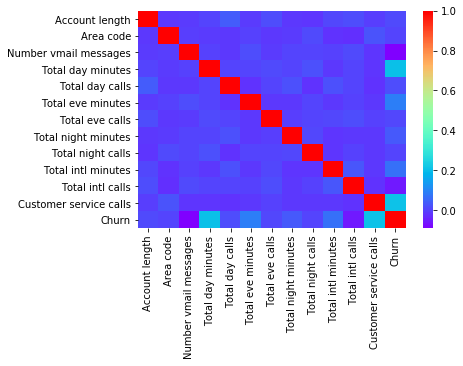

In [40]:
sns.heatmap(data_uncorr.corr(), cmap=plt.cm.rainbow);